<a href="https://colab.research.google.com/github/margaretmz/met-data-analysis/blob/master/Metropolitan_Museum_of_Art_Data_Analysis_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Metropolitan Museum of Art Open Access
## Data Analysis and Visualization

* Museum website: https://www.artic.edu/collection
* Kaggle data: https://www.kaggle.com/metmuseum/the-metropolitan-museum-of-art-open-access
* GitHub: https://github.com/metmuseum/openaccess - has the most recent .csv file
* Total number of artists: 56,390
* Total number of artworks: 448,203

I analyzed the data to answer the following questions:

* Artists
  * By date of birth
  *Which artists have the most artworks?
* Artworks
  * Which media have the top collection?
  * Which classifications have the top collection?
  * Which departments have the top collection?


>[The Metropolitan Museum of Art Open Access](#scrollTo=s9SU_l_7zT83&uniqifier=1)

>>[Data Analysis and Visualization](#scrollTo=s9SU_l_7zT83&uniqifier=1)

>>[Imports](#scrollTo=aE-An1Tgz1g6&uniqifier=1)

>>[Chart utils](#scrollTo=25mVFRGkXFrC&uniqifier=1)

>>[Create dataframe](#scrollTo=4Pj5wJjEWd-h&uniqifier=1)

>>[Missing values](#scrollTo=yvX7LcKPxeET&uniqifier=1)

>>[Artists](#scrollTo=R7zRtUbDV5uW&uniqifier=1)

>>>[Artist date of birth](#scrollTo=Zn0QIoGQJIpk&uniqifier=1)

>>>[Top 10 artists with the most artworks](#scrollTo=AkHnhzdgGuuy&uniqifier=1)

>>[Artworks](#scrollTo=XaHuo0djHTI0&uniqifier=1)

>>>[Artworks by department](#scrollTo=LmOwYPqpJm07&uniqifier=1)

>>>[Artworks by classification](#scrollTo=wRU_oRI4VETs&uniqifier=1)

>>>[Artworks by origin](#scrollTo=IrFsptywWCJX&uniqifier=1)

>>>[Artworks in the public domain](#scrollTo=iTfSa-ISeI2W&uniqifier=1)



## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chart utils
Here are two functions for making pie charts and bar charts.

In [80]:
def plot_pie_chart(values, labels, title):
  fig1, ax1 = plt.subplots()
  ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
  plt.title(title, size=14, pad=15)

  plt.show()

In [9]:
def plot_bar_chart(df, column, figsize=(10,5), title=None):
    counts = df[column].value_counts()[:10]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values, counts.index)
    plt.xlabel('Number of artworks', size=14, labelpad=15)
    plt.xticks(rotation=0)
    plt.ylabel(column, size=14)
    plt.title(title, size=14, pad=15)
    plt.show()

## Create dataframe

First let's create a dataframe from the `MetObjects.csv` file with Pandas read_csv().

In [11]:
met_art = pd.read_csv('MetObjects.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types.Specify dtype option on import or set low_memory=False.



In [16]:
# Let's take a look at the first 3 rows
met_art.head(3)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


There are 448,203 rows and 43 columns

In [17]:
met_art.shape

(448203, 43)

With `info()` we see a summary of the dataframe with column names, non-null count and data type. Notice some columns with a lot of nulls.

In [ ]:
met_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448203 entries, 0 to 448202
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            448203 non-null  object
 1   Is Highlight             448203 non-null  bool  
 2   Is Public Domain         448203 non-null  bool  
 3   Object ID                448203 non-null  int64 
 4   Department               448203 non-null  object
 5   Object Name              445568 non-null  object
 6   Title                    416906 non-null  object
 7   Culture                  186518 non-null  object
 8   Period                   71882 non-null   object
 9   Dynasty                  23018 non-null   object
 10  Reign                    10817 non-null   object
 11  Portfolio                20370 non-null   object
 12  Artist Role              259909 non-null  object
 13  Artist Prefix            88928 non-null   object
 14  Artist Display Name 

## Missing values

There are a lot of missing values in many of the columns. We don't neeed to worry about these missing values since we are not using the metadata for ML models training.

There are only 10 columns without missing values

In [ ]:
# Columns without missing values
no_nulls = set(met_art.columns[met_art.isnull().mean()==0])
# Only 10 columns have no missing values
len(no_nulls)

10

23 out of 42 columns have missing values > 50%

In [ ]:
# A set of colums with more than 50% missing values
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.50])
print(len(missing_cols))
print(missing_cols)

23
{'Geography Type', 'Excavation', 'Artist Begin Date', 'Period', 'Locus', 'Culture', 'City', 'Region', 'Reign', 'Rights and Reproduction', 'Artist Display Bio', 'River', 'County', 'Country', 'Artist Suffix', 'Locale', 'Artist Prefix', 'Subregion', 'Artist End Date', 'State', 'Artist Nationality', 'Portfolio', 'Dynasty'}


18 out of 42 columns have missing values > 75%

In [28]:
# A set of colums with more than 75% missing values
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.75])
print(len(missing_cols))
print(missing_cols)

18
{'City', 'River', 'Country', 'County', 'Portfolio', 'Dynasty', 'Geography Type', 'Rights and Reproduction', 'Artist Prefix', 'Region', 'Locus', 'Reign', 'Locale', 'Subregion', 'Artist Suffix', 'Period', 'State', 'Excavation'}


In [29]:
# See the list of columns with mostly (>75%) missing values
for col in missing_cols:
  print(col)

City
River
Country
County
Portfolio
Dynasty
Geography Type
Rights and Reproduction
Artist Prefix
Region
Locus
Reign
Locale
Subregion
Artist Suffix
Period
State
Excavation


In [30]:
# Number of missing values for each column, sorted in descending order
met_art.isnull().sum().sort_values(ascending=False)

River                      446100
County                     445715
Locus                      441264
State                      439843
Artist Suffix              437991
Reign                      437386
Locale                     433108
Excavation                 432684
Portfolio                  427833
Subregion                  426487
Rights and Reproduction    425228
Dynasty                    425185
City                       417683
Region                     417125
Geography Type             389740
Period                     376321
Country                    373753
Artist Prefix              359275
Culture                    261685
Artist Nationality         252071
Artist End Date            235378
Artist Begin Date          232969
Artist Display Bio         224139
Artist Role                188294
Artist Alpha Sort          187115
Artist Display Name        187092
Dimensions                  62843
Classification              58279
Title                       31297
Object Date   

## Artists

### Artist nationality
Over half of the artists (56.3%) are American, followed by French (19.8%) and Italian (13.4%).

In [68]:
met_art['Artist Nationality'].value_counts()[:10]

American                63137
French                  18675
Italian                 12658
French|French            9163
British                  8508
American|American        7441
German                   7365
Japanese                 6259
Italian|Italian          4528
French|French|French     4148
Name: Artist Nationality, dtype: int64

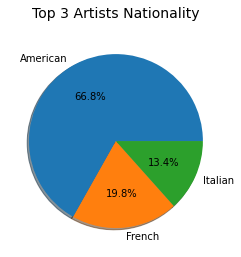

In [81]:
values = met_art['Artist Nationality'].value_counts()[:3].values
labels = met_art['Artist Nationality'].value_counts()[:3].index

plot_pie_chart(values, labels, "Top 3 Artists Nationality")

### Artist date of birth
Here is a histogram of artist date of birth indicates that many artists are born around 1950's. 

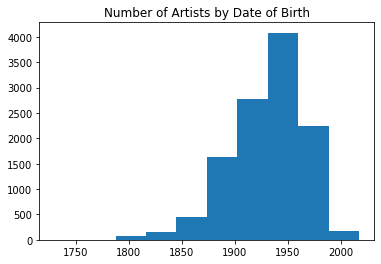

In [ ]:
plt.hist(met_art[met_art.Artist!=0]['Artist Begin Date'])
plt.title('Number of Artists by Date of Birth')
plt.show()

### Top 10 artists with the most artworks

In [33]:
# There are total of 56,390 artists 
met_art['Artist Display Name'].describe()

count           261111
unique           56390
top       Walker Evans
freq              9659
Name: Artist Display Name, dtype: object

Among the top 10 artists with the most collections, the artist named **Walker Evans** has the largest artworks at 9,659.


In [34]:
met_art['Artist Display Name'].value_counts()[:10]

Walker Evans                 9659
Kinney Brothers              4282
Allen & Ginter               3184
W. Duke, Sons & Co.          3148
Goodwin & Company            2747
Unknown                      2581
Brewster & Co.               2296
American Tobacco Company     1993
Bowman Gum Company           1992
Topps Chewing Gum Company    1232
Name: Artist Display Name, dtype: int64

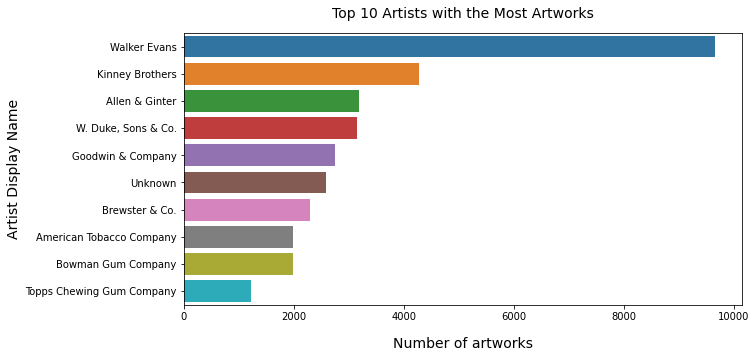

In [32]:
plot_bar_chart(met_art, column="Artist Display Name", title='Top 10 Artists with the Most Artworks')

## Artworks

### Artworks in the public domain

Near half of the artworks are in the public domain which means you can use them freely.

In [ ]:
# Almost half of the artworks are in the public domain 
met_art['Is Public Domain'].value_counts()

False    246004
True     202199
Name: Is Public Domain, dtype: int64

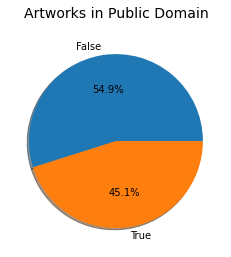

In [83]:
values = met_art['Is Public Domain'].value_counts()[:5].values
labels = met_art['Is Public Domain'].value_counts()[:5].index

plot_pie_chart(values, labels, "Artworks in Public Domain")

### Top artworks media

In [63]:
met_art['Medium'].value_counts()[:10]

Commercial color lithograph    20209
Etching                        15038
Albumen photograph             10389
Engraving                       9723
Gelatin silver print            8961
Silk                            8398
Terracotta                      7299
Bronze                          7265
Glass                           6665
Film negative                   6211
Name: Medium, dtype: int64

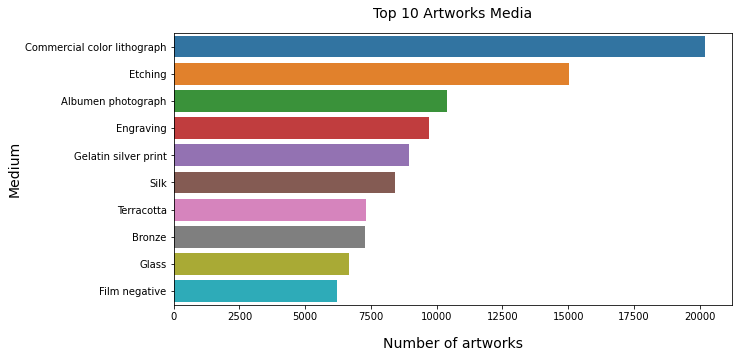

In [78]:
plot_bar_chart(met_art, column='Medium', title="Top 10 Artworks Media")

### Artworks by department
Let's visualize the artworks by department - looks like **Drawings and Prints** department has the largest art collection.

In [23]:
met_art['Department'].value_counts()

Drawings and Prints                          154445
European Sculpture and Decorative Arts        42528
Asian Art                                     36727
Photographs                                   36258
Costume Institute                             33681
Egyptian Art                                  27542
Greek and Roman Art                           17292
Islamic Art                                   15082
Modern and Contemporary Art                   13991
Arms and Armor                                13486
Arts of Africa, Oceania, and the Americas     12427
American Decorative Arts                      12330
Medieval Art                                   7343
Ancient Near Eastern Art                       6185
American Paintings and Sculpture               5451
Musical Instruments                            5303
European Paintings                             2760
The Cloisters                                  2628
Robert Lehman Collection                       2589
The Librarie

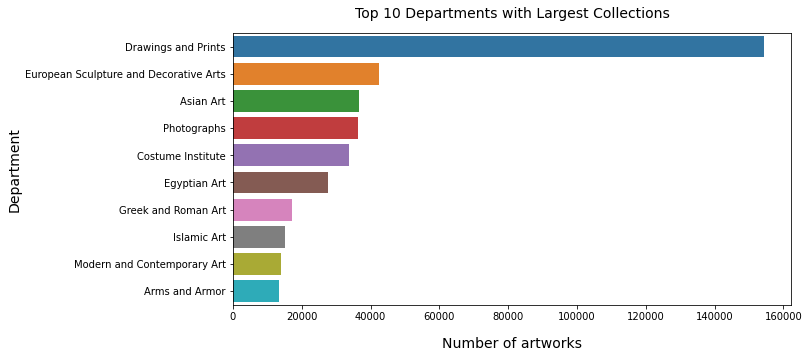

In [24]:
plot_bar_chart(met_art, column='Department', title="Top 10 Departments with Largest Collections")

### Top artworks classification
The **Prints** classification has the largest number of artworks, twice as many as the 2nd largest classification of **Prints|Ephemera**.

Note: if we were to use the images for classification then we need to figure out the overlap between **Prints**, **Prints|Ephemera** and Photographs|Ephemera.

In [ ]:
met_art['Classification'].value_counts()[:10]

Prints                  69260
Prints|Ephemera         30033
Photographs             26821
Drawings                25230
Books                   14685
Ceramics                13332
Paintings               11038
Textiles-Woven          10995
Photographs|Ephemera    10940
Glass                    8838
Name: Classification, dtype: int64

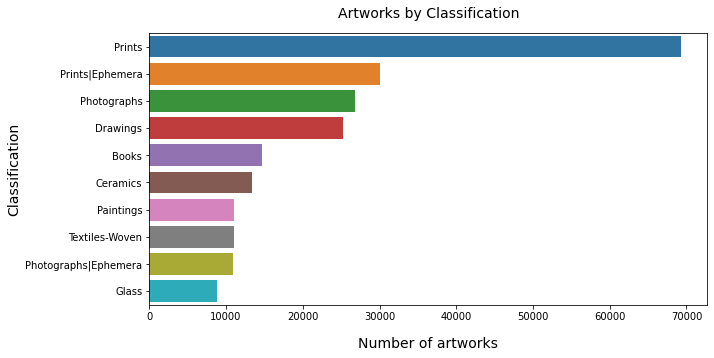

In [35]:
plot_bar_chart(met_art, column='Classification', title="Artworks by Classification")

### Artworks by country and culture

It's interesting to see that the artworks are mostly from Egypt although the top culture is American, which is consistent with the artist nationality above - 56.3% of artists are Americans.

In [77]:
met_art['Country'].value_counts()[:10]

Egypt              30914
United States       8501
Iran                5886
Peru                3422
Byzantine Egypt     1673
France              1670
Mexico              1537
India               1440
Indonesia           1394
England             1059
Name: Country, dtype: int64

Let's visualize the top 5 countries with the most collections. And 61.3% artworks are from Egypt.

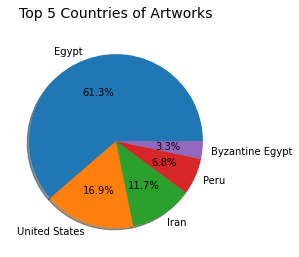

In [84]:
values = met_art['Country'].value_counts()[:5].values
labels = met_art['Country'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Countries of Artworks")

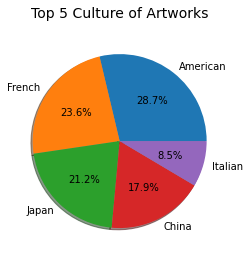

In [86]:
values = met_art['Culture'].value_counts()[:5].values
labels = met_art['Culture'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Culture of Artworks")